### Genre Exploration

In [2]:
# dependencies
import pandas as pd
from pathlib import Path
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
#import csv's
data_parq = Path("Resources/mo_movies_data.parquet")

data_df = pd.read_parquet(data_parq)

In [6]:
data_df

,Title,Year,IMDB Rating,IMDB Votes,Genre,Box Office,IMDB ID,Budget,Revenue
0,Camille Claudel 1915,2013,6.5,3889.0,"Biography, Drama","$35,296",tt2018086,3512454,115860.0
1,A Sound of Thunder,2005,4.2,20549.0,"Action, Adventure, Horror","$1,900,451",tt0318081,80000000,5989640.0
2,The Jacket,2005,7.1,119641.0,"Drama, Fantasy, Mystery","$6,303,762",tt0366627,29000000,21126225.0
3,The Interpreter,2005,6.4,111280.0,"Crime, Mystery, Thriller","$72,708,161",tt0373926,80000000,162944923.0
4,The Ring Two,2005,5.4,101457.0,"Horror, Mystery","$76,231,249",tt0377109,50000000,161451538.0
...,...,...,...,...,...,...,...,...,...
2311,FC Venus,2005,5.5,2325.0,"Comedy, Romance, Sport",N/A,tt0453365,2196531,2411594.0
2312,Sivaji,2007,7.5,21484.0,"Action, Crime, Drama",N/A,tt0479751,12000000,19000000.0
2313,Dikari,2006,6.5,693.0,Comedy,N/A,tt0933361,800000,1328612.0
2314,Pro lyuboff,2010,5.8,297.0,Drama,N/A,tt1718881,2000000,1268793.0


In [8]:
data_df["ROI$"] = (data_df['Revenue'] - data_df['Budget'])
data_df

,Title,Year,IMDB Rating,IMDB Votes,Genre,Box Office,IMDB ID,Budget,Revenue,ROI$
0,Camille Claudel 1915,2013,6.5,3889.0,"Biography, Drama","$35,296",tt2018086,3512454,115860.0,-3396594.0
1,A Sound of Thunder,2005,4.2,20549.0,"Action, Adventure, Horror","$1,900,451",tt0318081,80000000,5989640.0,-74010360.0
2,The Jacket,2005,7.1,119641.0,"Drama, Fantasy, Mystery","$6,303,762",tt0366627,29000000,21126225.0,-7873775.0
3,The Interpreter,2005,6.4,111280.0,"Crime, Mystery, Thriller","$72,708,161",tt0373926,80000000,162944923.0,82944923.0
4,The Ring Two,2005,5.4,101457.0,"Horror, Mystery","$76,231,249",tt0377109,50000000,161451538.0,111451538.0
...,...,...,...,...,...,...,...,...,...,...
2311,FC Venus,2005,5.5,2325.0,"Comedy, Romance, Sport",N/A,tt0453365,2196531,2411594.0,215063.0
2312,Sivaji,2007,7.5,21484.0,"Action, Crime, Drama",N/A,tt0479751,12000000,19000000.0,7000000.0
2313,Dikari,2006,6.5,693.0,Comedy,N/A,tt0933361,800000,1328612.0,528612.0
2314,Pro lyuboff,2010,5.8,297.0,Drama,N/A,tt1718881,2000000,1268793.0,-731207.0


In [10]:
# set display to 2 decimal instead of scientific notation
pd.set_option('display.float_format', '{:.0f}'.format)

In [12]:
# here's the entire list of genres to pull from:
unique = list(data_df["Genre"].unique())

genre_set = set()
for genres in unique:
    split = genres.replace(" ", "").split(",")
    genre_set.update(split)

#len(genre_set)

genre_count = {k:[data_df[data_df["Genre"].str.contains(k)]["Title"].count(),\
                 data_df[data_df["Genre"].str.contains(k)]["Revenue"].sum(),\
                 data_df[data_df["Genre"].str.contains(k)]["Budget"].sum(),\
                 data_df[data_df["Genre"].str.contains(k)]["ROI$"].sum()] for k in genre_set}
genre_count_df = pd.DataFrame(genre_count).T.rename(columns ={0:"Genre Count", 1:"Total Revenue", 2:"Total Budget", 3:"Return on Investment"})
genre_count_df

,Genre Count,Total Revenue,Total Budget,Return on Investment
War,46,1729194863,1085900000,643294863
Sci-Fi,191,43902239574,14032010288,29870229286
Sport,45,2279436935,1124427704,1155009231
Comedy,859,83943140339,28711334545,55231805794
Drama,1225,73957193133,30514492261,43442700872
Music,85,5129804117,1835934442,3293869675
Biography,165,10596635741,4228203293,6368432448
Mystery,249,17035741487,6239863837,10795877650
Thriller,387,35815338529,12263095242,23552243287
Action,675,116701735028,42435936638,74265798390


In [14]:
# add genre to the index
genre_count_df['Genre'] = genre_count_df.index

# Reset index. drop=True removes the old index. inplace=True modifies without making a copy
genre_count_df.reset_index(drop=True, inplace=True)

# Reorder columns
genre_df = genre_count_df[['Genre', 'Genre Count', 'Total Revenue', 'Total Budget', 'Return on Investment']]

genre_df

,Genre,Genre Count,Total Revenue,Total Budget,Return on Investment
0,War,46,1729194863,1085900000,643294863
1,Sci-Fi,191,43902239574,14032010288,29870229286
2,Sport,45,2279436935,1124427704,1155009231
3,Comedy,859,83943140339,28711334545,55231805794
4,Drama,1225,73957193133,30514492261,43442700872
5,Music,85,5129804117,1835934442,3293869675
6,Biography,165,10596635741,4228203293,6368432448
7,Mystery,249,17035741487,6239863837,10795877650
8,Thriller,387,35815338529,12263095242,23552243287
9,Action,675,116701735028,42435936638,74265798390


In [16]:
# genre_rev = genre_count_df.groupby(['Total Revenue'])
# print(genre_rev)

In [18]:
genre_total_revenue = {k:data_df[data_df["Genre"].str.contains(k)]["Revenue"].sum() for k in genre_set}
genre_total_revenue_df = pd.DataFrame(
    list(genre_total_revenue.items()),
    columns=["Genre", "Total Revenue"]
)
rev_sort = genre_total_revenue_df.sort_values(['Total Revenue'],ascending=False)


In [38]:
top_rev_genre = rev_sort.head(10)
top_rev_genre

,Genre,Total Revenue
14,Adventure,129820038026
20,Action,116701735028
6,Comedy,83943140339
13,Drama,73957193133
11,Sci-Fi,43902239574
5,Animation,38341964609
16,Thriller,35815338529
3,Fantasy,33605612095
7,Crime,26063419086
18,Romance,23817499004


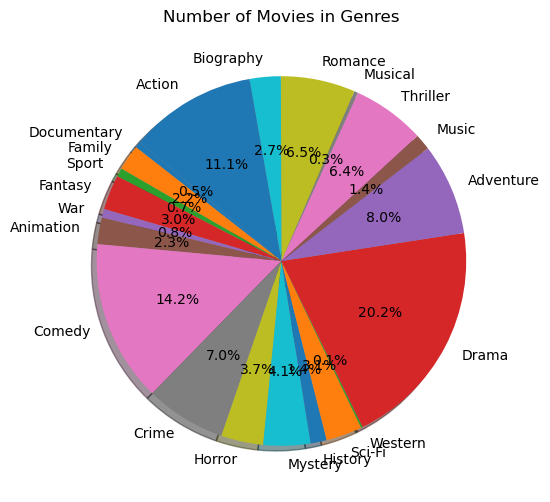

In [41]:
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.figure(figsize=(10, 6))
plt.pie(genre_count_df["Genre Count"], labels=genre_count_df["Genre"], shadow=True, autopct='%1.1f%%', startangle=140)
plt.title('Number of Movies in Genres')
plt.show()

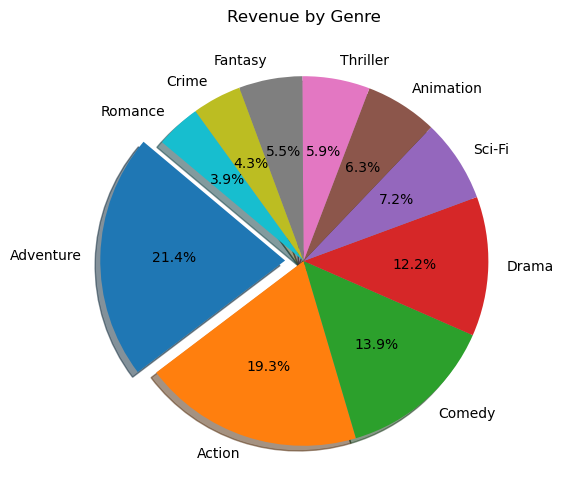

In [26]:
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.figure(figsize=(10, 6))
plt.pie(top_rev_genre["Total Revenue"], labels=top_rev_genre["Genre"], explode=explode, shadow=True, autopct='%1.1f%%', startangle=140)
plt.title('Revenue by Genre')
plt.show()

In [28]:
genre_budget = {k:data_df[data_df["Genre"].str.contains(k)]["Budget"].sum() for k in genre_set}
genre_budget_df = pd.DataFrame(
    list(genre_budget.items()),
    columns=["Genre", "Budget"]
)
budget_sort = genre_budget_df.sort_values(['Budget'],ascending=False)

In [30]:
top_budget_genre = budget_sort.head(10)
top_budget_genre

,Genre,Budget
9,Action,42435936638
18,Adventure,41519950639
4,Drama,30514492261
3,Comedy,28711334545
1,Sci-Fi,14032010288
8,Thriller,12263095242
12,Crime,11844484650
16,Animation,11561227737
15,Fantasy,11211596621
10,Romance,9156074714


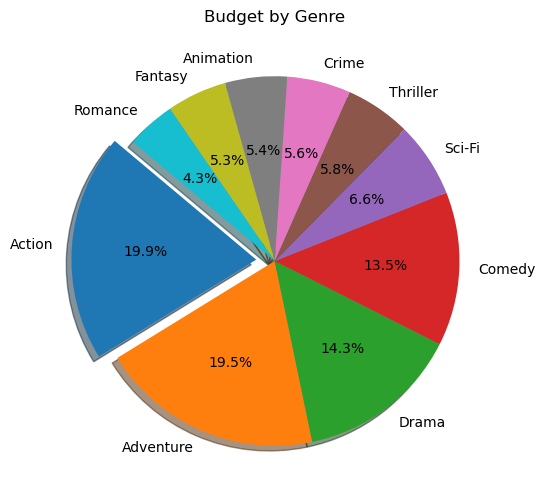

In [32]:
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.figure(figsize=(10, 6))
plt.pie(top_budget_genre["Budget"], labels=top_budget_genre["Genre"], explode=explode, shadow=True, autopct='%1.1f%%', startangle=140)
plt.title('Budget by Genre')
plt.show()

In [34]:
genre_roi = {k:data_df[data_df["Genre"].str.contains(k)]["ROI$"].sum() for k in genre_set}
genre_roi = pd.DataFrame(
    list(genre_roi.items()),
    columns=["Genre", "Return on Investment"]
)
roi_sort = genre_roi.sort_values(['Return on Investment'],ascending=False)

In [36]:
top_roi_genre = roi_sort.head(10)
top_roi_genre

,Genre,Return on Investment
18,Adventure,88300087387
9,Action,74265798390
3,Comedy,55231805794
4,Drama,43442700872
1,Sci-Fi,29870229286
16,Animation,26780736872
8,Thriller,23552243287
15,Fantasy,22394015474
10,Romance,14661424290
14,Family,14418338191


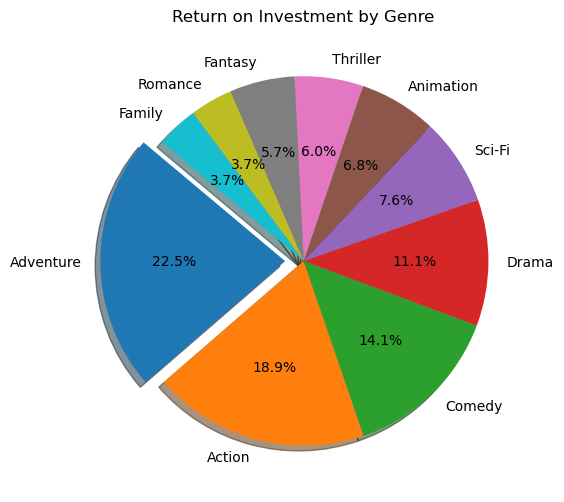

In [38]:
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.figure(figsize=(10, 6))
plt.pie(top_roi_genre["Return on Investment"], labels=top_roi_genre["Genre"],explode=explode, shadow=True, autopct='%1.1f%%', startangle=140)
plt.title('Return on Investment by Genre')
plt.show()

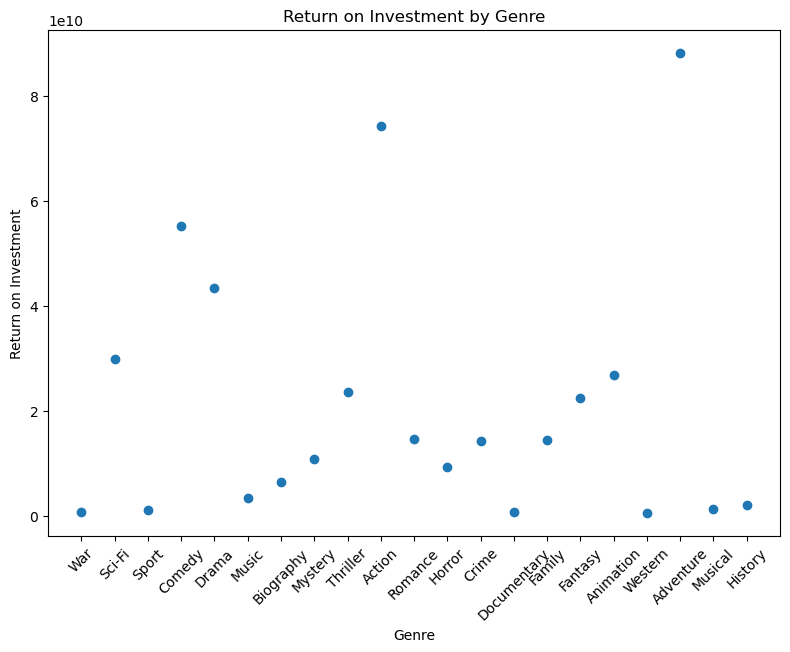

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(genre_df['Genre'], genre_df['Return on Investment'])
plt.xlabel('Genre')
plt.ylabel('Return on Investment')
plt.title('Return on Investment by Genre')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

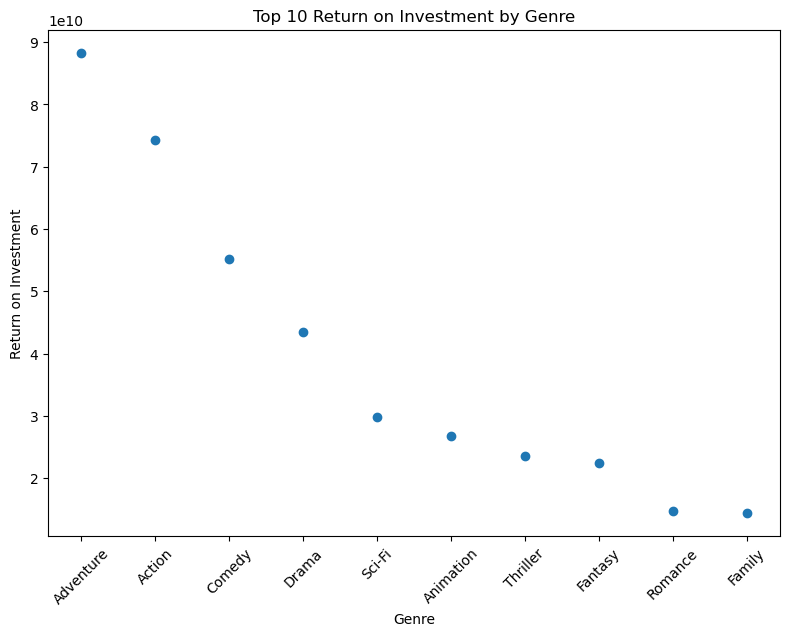

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(top_roi_genre['Genre'], top_roi_genre['Return on Investment'])
plt.xlabel('Genre')
plt.ylabel('Return on Investment')
plt.title('Top 10 Return on Investment by Genre')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

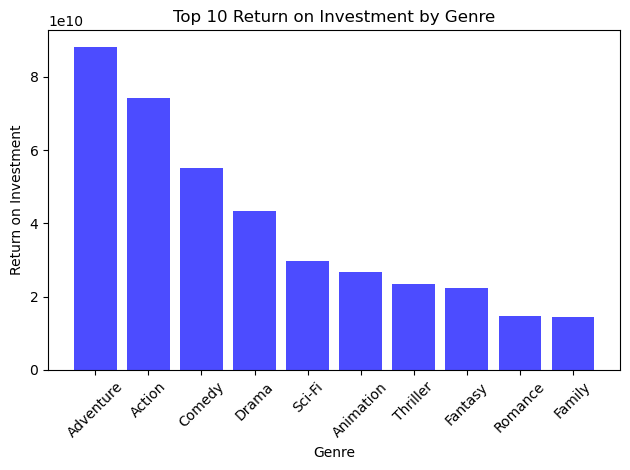

In [44]:
plt.bar(top_roi_genre['Genre'], top_roi_genre['Return on Investment'], color='b', alpha=0.7, align="center")
plt.xlabel('Genre')
plt.ylabel('Return on Investment')
plt.title('Top 10 Return on Investment by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

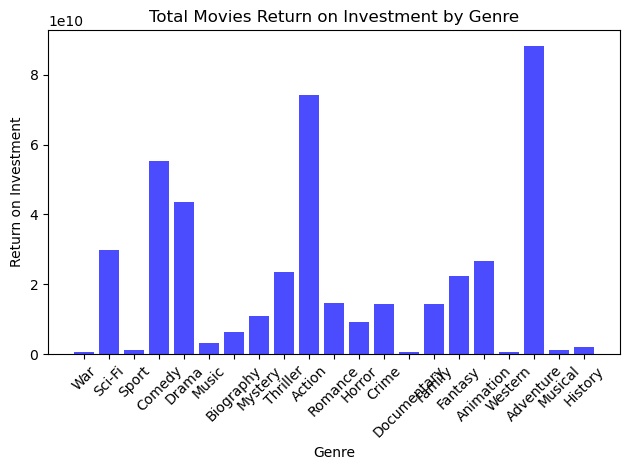

In [50]:
plt.bar(genre_df['Genre'], genre_df['Return on Investment'], color='b', alpha=0.7, align="center")
plt.xlabel('Genre')
plt.ylabel('Return on Investment')
plt.title('Total Movies Return on Investment by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Code and notes

In [ ]:
# ax = top_roi_genre.boxplot(column="Return on Investment", by=["Genre"])
# ax.set_title("Top 10 Return on Investment by Genre")
# ax.set_xlabel("Return on Investment")
# ax.set_ylabel("Genre")
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
# https://stackoverflow.com/questions/19169649/how-to-use-str-contains-with-multiple-expressions-in-pandas-dataframes

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html#pandas.DataFrame.isin

In [ ]:
# https://www.geeksforgeeks.org/difference-between-list-vs-set-vs-tuple-in-python/